# Mental Health in Tech Survey - Data exploration

This data comes from OSMI Institution and from data description we know that this dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

This dataset contains the following columns:

- Timestamp
- Age
- Gender
- Country
- state: If you live in the United States, which state or territory do you live in?
- self_employed: Are you self-employed?
- family_history: Do you have a family history of mental illness?
- treatment: Have you sought treatment for a mental health condition?
- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
- no_employees: How many employees does your company or organization have?
- remote_work: Do you work remotely (outside of an office) at least 50% of the time?
- tech_company: Is your employer primarily a tech company/organization?
- benefits: Does your employer provide mental health benefits?
- care_options: Do you know the options for mental health care your employer provides?
- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse - treatment resources?
- leave: How easy is it for you to take medical leave for a mental health condition?
- mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
- physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
- coworkers: Would you be willing to discuss a mental health issue with your coworkers?
- supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?
- physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
- mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?
- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in - your workplace?
- comments: Any additional notes or comments

Inspiration
Some questions worth exploring:

What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?

In [120]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [121]:
# Open downloaded dataset
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,...,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [122]:
# EDA - Check any duplicates
df.duplicated().any()

False

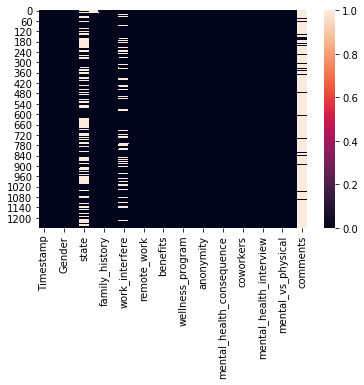

In [123]:
# EDA - Check NA values
# Clearly there are some missing values for state, work_interfere and comments, but we are going to drop
# these three columns which we will explain why later.

sns.heatmap(df.isnull())



In [124]:
# EDA - Check Info & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [125]:
# EDA - Check Gender uniques first, it appears quite messy and we will further categorize them into Male, Female & Others
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [126]:
# EDA - Check Null again, this time there are also some missing values in self_employed 
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

# Abstract

#### The goal of this classification model is to identify tech workers who have history of mental health treatment before, based on a set of questions representing healthcare resources, psychological and societal factors and its potential impact on the likeliness of seeking treatment.

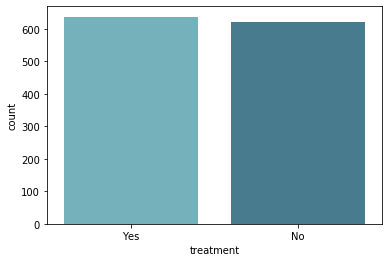

In [127]:
# EDA - Visualize classes between Treatment - Yes & No
# A relatively balanced dataset
sns.countplot(data=df, x='treatment', palette='GnBu_d')

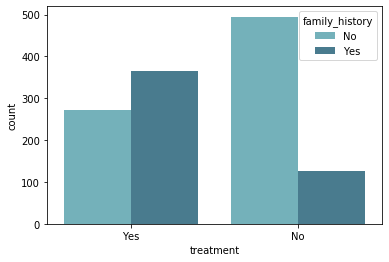

In [128]:
# Going into this dataset, We were curious as to whether or not family history affected how the participant 
# handled their mental health.

# It seems that people with family history of mental health are a lot more likely to seek out 
# treatment compared to those who have never had a family history.

sns.countplot(data=df,x='treatment', hue='family_history',palette='GnBu_d')

In [129]:
# EDA - Drop unnecessary columns
# Timestamp, state, comments are first dropped as these are not the focus in this project, as we won't be going deep
# into geospatial resource gap and semantic analysis.

df = df.drop(['Timestamp','state','comments'],axis=1)

In [130]:
# EDA - Check unique values: Country  --> One-hot
df['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Sweden                      7
Switzerland                 7
Poland                      7
Italy                       7
Brazil                      6
Belgium                     6
South Africa                6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Austria                     3
Mexico                      3
Finland                     3
Portugal                    2
Denmark                     2
Colombia                    2
Croatia                     2
Greece                      2
Japan                       1
Bahamas, The                1
Philippines                 1
Bosnia and Herzegovina      1
Romania   

In [131]:
# EDA - Check unique values: Gender --> One-hot
df['Gender'].value_counts()

# Need to group to M/F/O

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female (cis)                                        1
Trans woman                                         1
queer/she/they                                      1
queer                       

In [132]:
# EDA - Check unqiue values: Self_employed --> One-hot
df['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [133]:
# EDA - Check unqiue values: family_history --> One-hot
df['family_history'].value_counts()

No     767
Yes    492
Name: family_history, dtype: int64

In [134]:
# EDA - Check unqiue values: Treatment --> One-hot
df['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

In [135]:
# EDA - Check unqiue values: work_interfere --> Label encoding
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [136]:
# EDA - Check unqiue values: no_employees  --> Label encoding
df['no_employees'].value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

In [137]:
# EDA - Check unqiue values: remote_work  --> One-hot
df['remote_work'].value_counts()

No     883
Yes    376
Name: remote_work, dtype: int64

In [138]:
# EDA - Check unqiue values: tech_company --> One-hot
df['tech_company'].value_counts()

Yes    1031
No      228
Name: tech_company, dtype: int64

In [139]:
# EDA - Check unqiue values: benefits --> one-hot
df['benefits'].value_counts()

Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64

In [140]:
# EDA - Check unqiue values: care_options --> one-hot
df['care_options'].value_counts()

No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64

In [141]:
# EDA - Check unqiue values: wellness_program --> one-hot
df['wellness_program'].value_counts()

No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64

In [142]:
# EDA - Check unqiue values: seek_help --> one-hot
df['seek_help'].value_counts()

No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64

In [143]:
# EDA - Check unqiue values: anonymity --> one-hot
df['anonymity'].value_counts()

Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64

In [144]:
# EDA - Check unqiue values: leave --> label-encoding
df['leave'].value_counts()

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

In [145]:
# EDA - Check unqiue values: mental_health_consequence --> one-hot
df['mental_health_consequence'].value_counts()

No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64

In [146]:
# EDA - Check unqiue values: phys_health_consequence --> one-hot
df['phys_health_consequence'].value_counts()

No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64

In [147]:
# EDA - Check unqiue values: coworkers --> one-hot
df['coworkers'].value_counts()

Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64

In [148]:
# EDA - Check unqiue values: supervisor --> one-hot
df['supervisor'].value_counts()

Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64

In [149]:
# EDA - Check unqiue values: mental_health_interview --> one-hot
df['mental_health_interview'].value_counts()

No       1008
Maybe     207
Yes        44
Name: mental_health_interview, dtype: int64

In [150]:
# EDA - Check unqiue values: phys_health_interview --> one-hot
df['phys_health_interview'].value_counts()

Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64

In [151]:
# EDA - Check unqiue values: mental_vs_physical --> one-hot
df['mental_vs_physical'].value_counts()

Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64

In [152]:
# EDA - Check unqiue values: obs_consequence --> one-hot
df['obs_consequence'].value_counts()

No     1075
Yes     184
Name: obs_consequence, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may cons

<Figure size 1800x720 with 0 Axes>

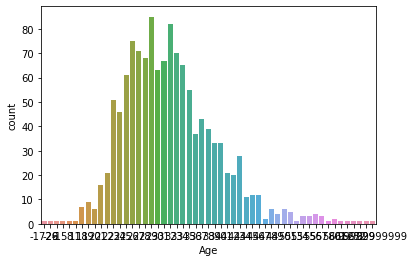

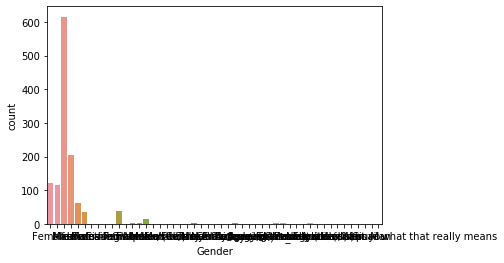

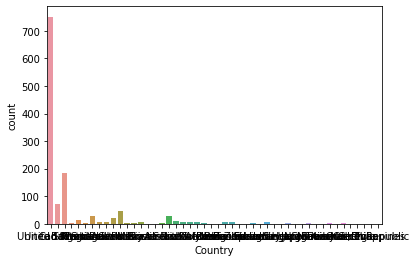

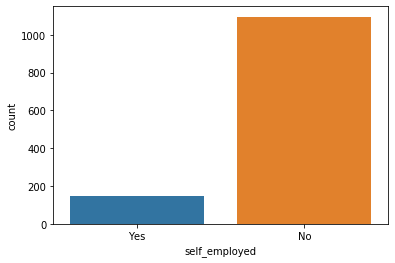

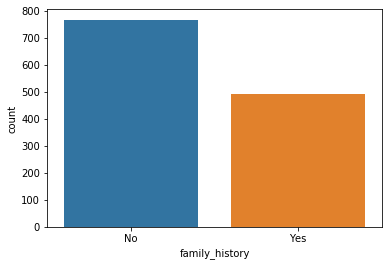

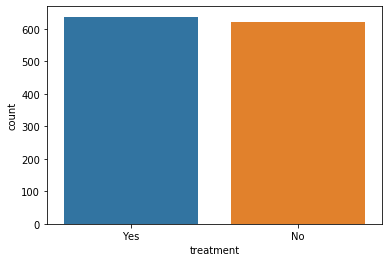

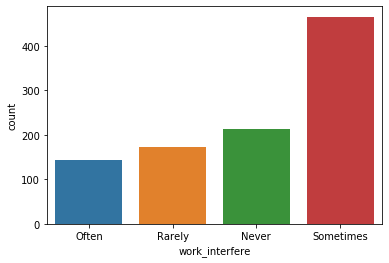

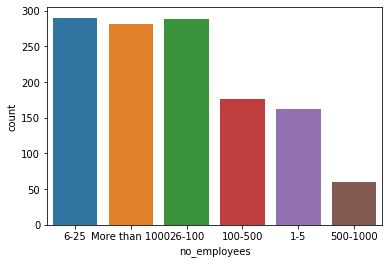

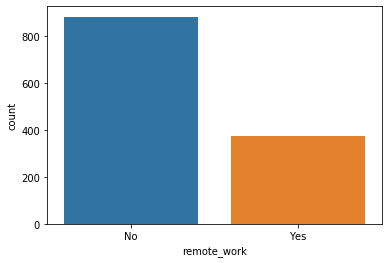

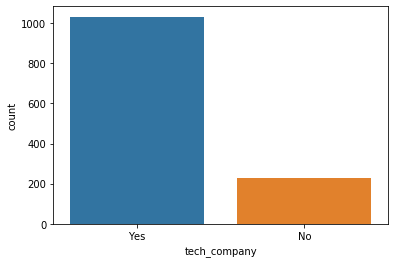

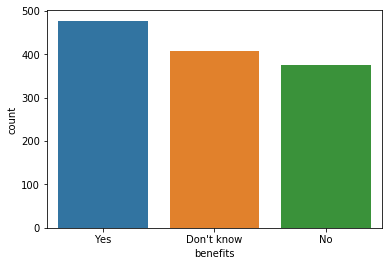

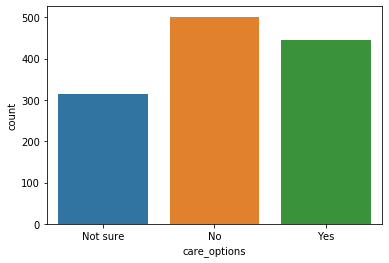

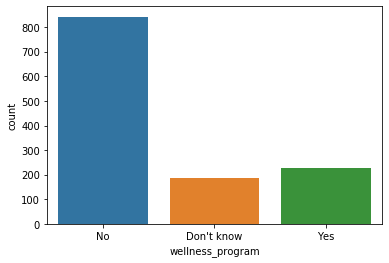

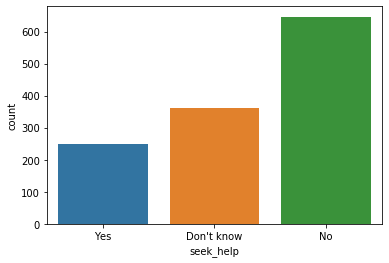

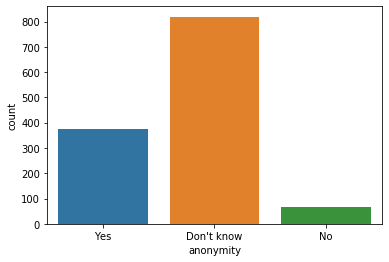

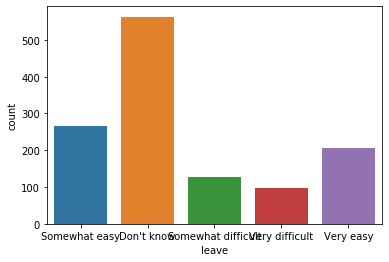

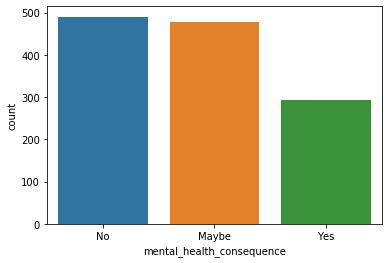

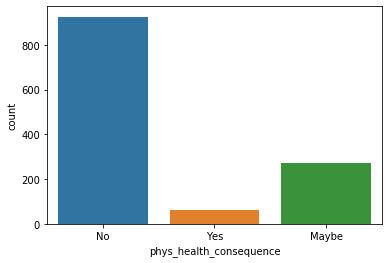

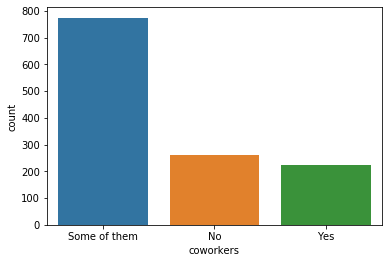

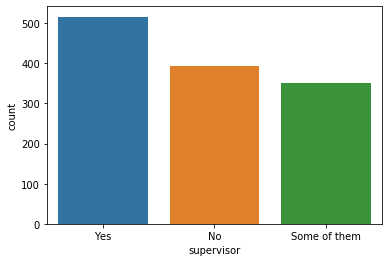

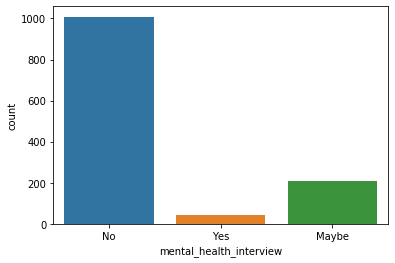

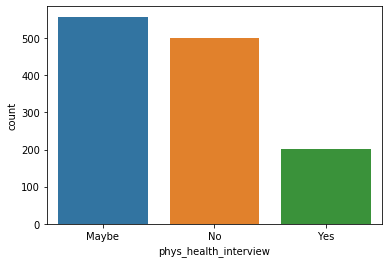

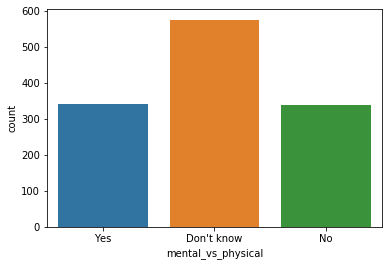

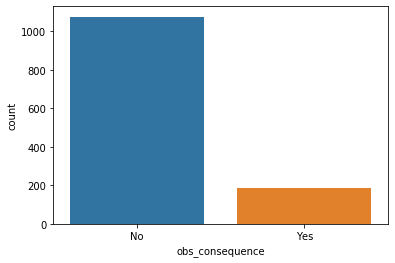

In [153]:
# EDA - Countplot plot
plt.figure(figsize=(25,10))
for col in df.columns:
    plt.subplots()
    sns.countplot(data=df,x=col)

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is de

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is de

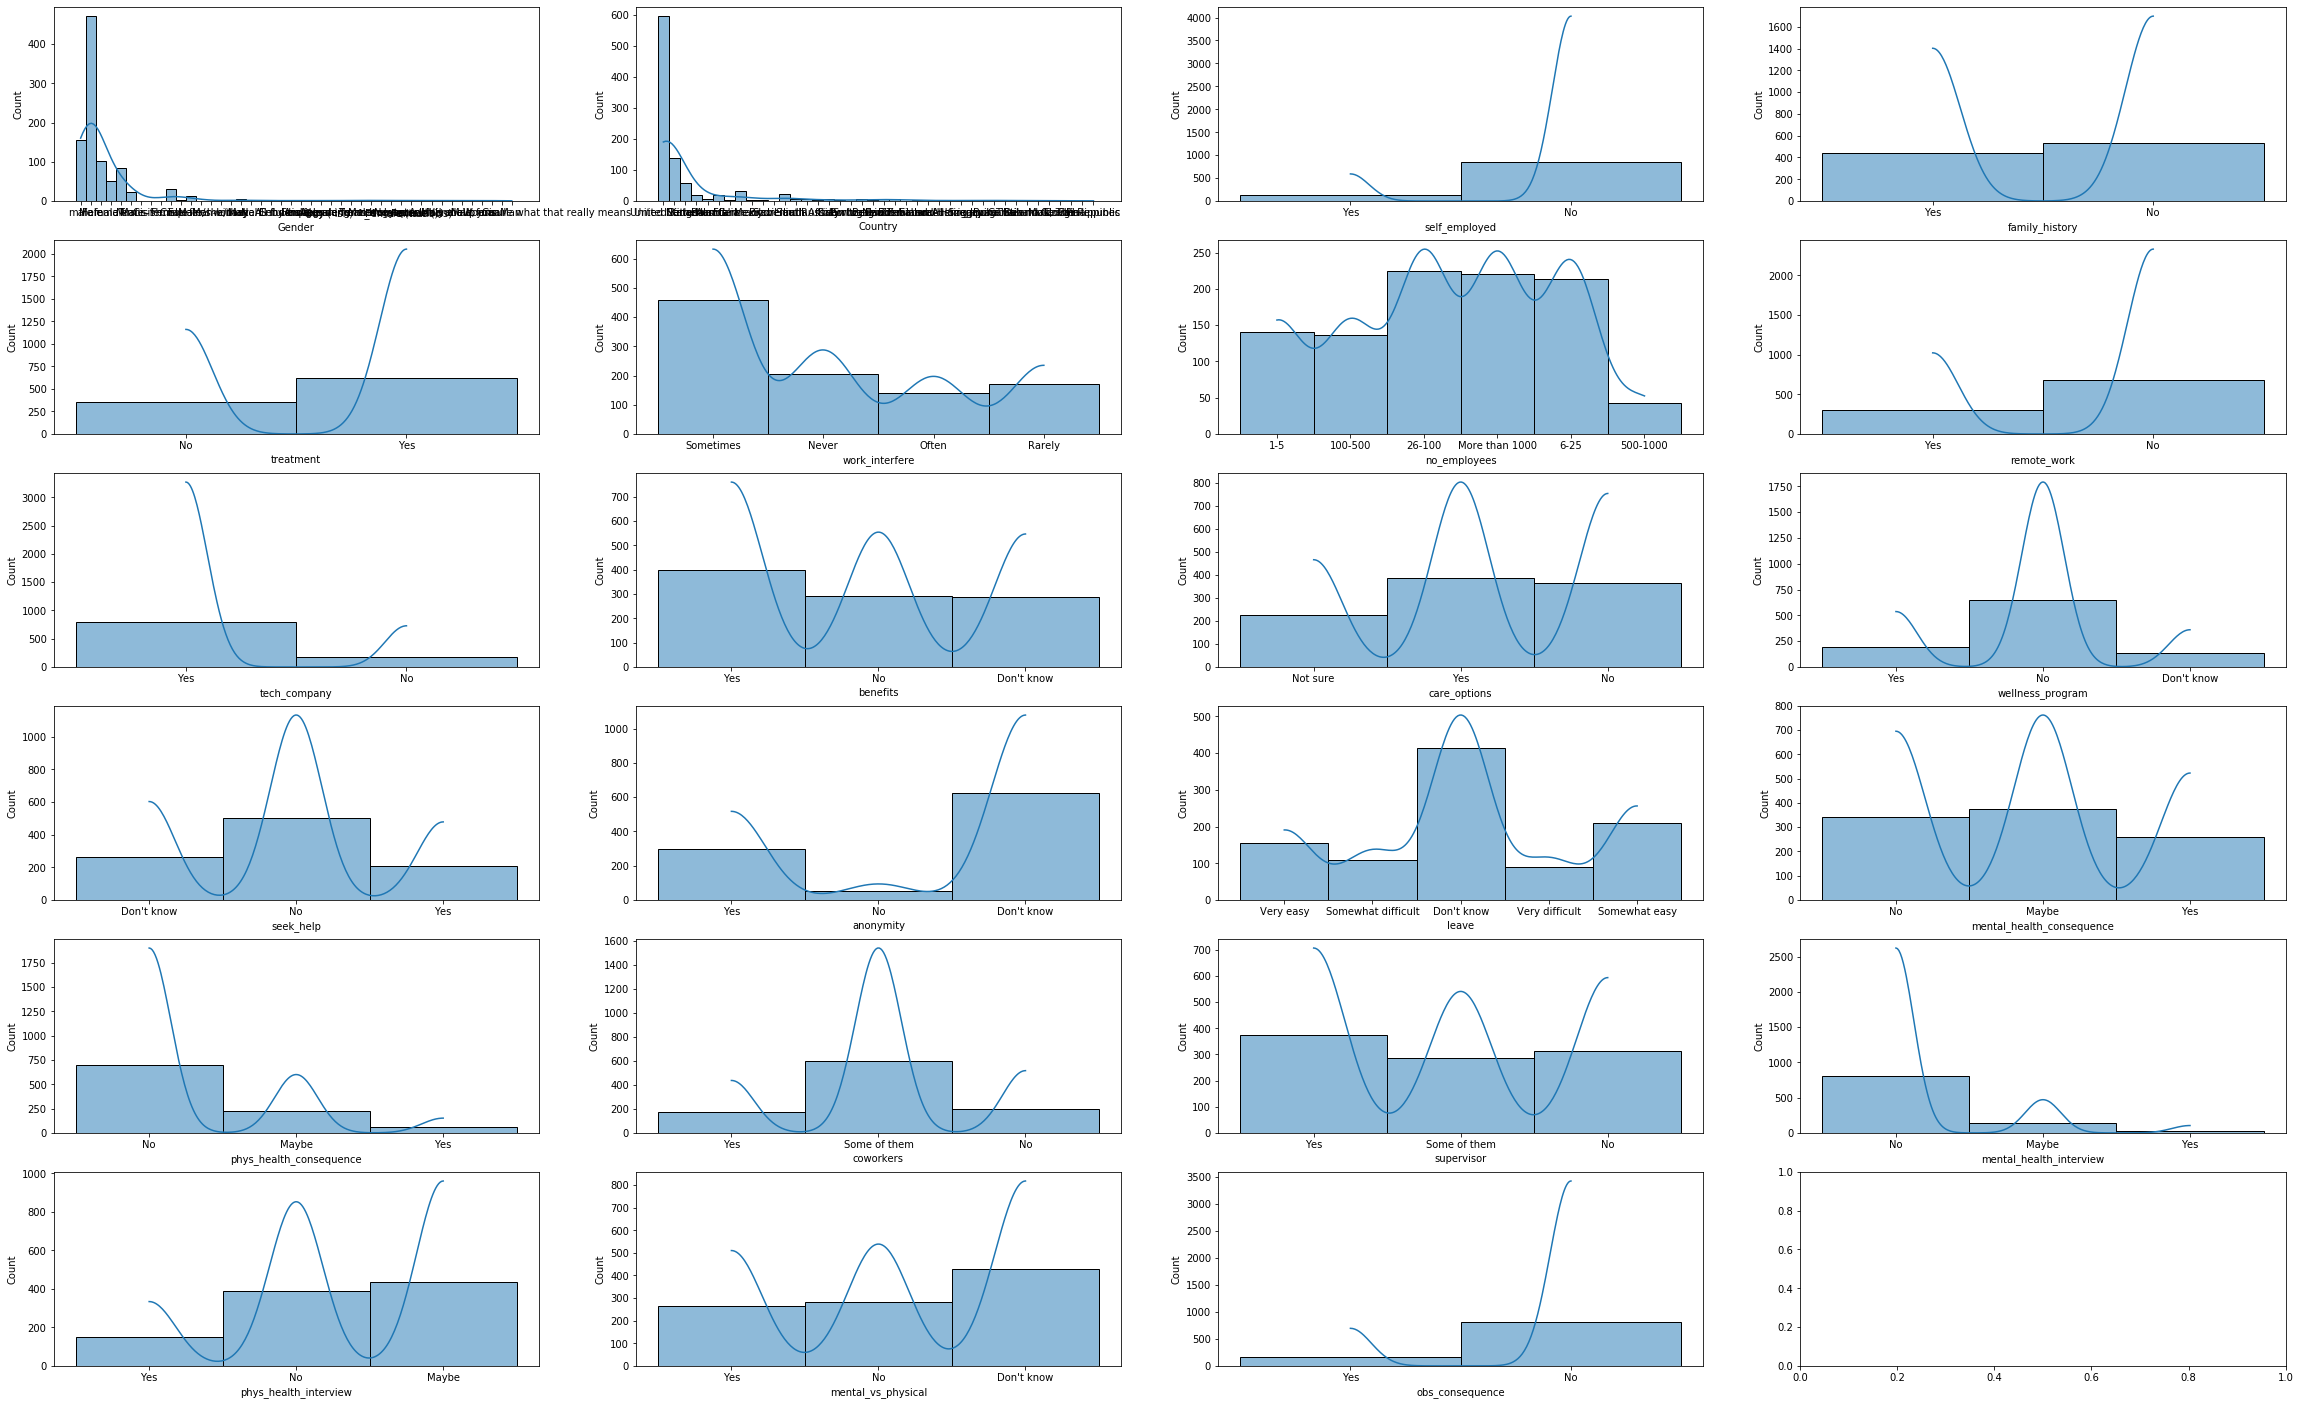

In [154]:
# EDA - Histplot plot
dfcopy = df.dropna(axis=0)
fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(40,25))
sns.histplot(data=dfcopy,x='Gender',kde=True,ax=ax[0,0])
sns.histplot(data=dfcopy,x='Country',kde=True,ax=ax[0,1])
sns.histplot(data=dfcopy,x='self_employed',kde=True,ax=ax[0,2])
sns.histplot(data=dfcopy,x='family_history',kde=True,ax=ax[0,3])
sns.histplot(data=dfcopy,x='treatment',kde=True,ax=ax[1,0])
sns.histplot(data=dfcopy,x='work_interfere',kde=True,ax=ax[1,1])
sns.histplot(data=dfcopy,x='no_employees',kde=True,ax=ax[1,2])
sns.histplot(data=dfcopy,x='remote_work',kde=True,ax=ax[1,3])
sns.histplot(data=dfcopy,x='tech_company',kde=True,ax=ax[2,0])
sns.histplot(data=dfcopy,x='benefits',kde=True,ax=ax[2,1])
sns.histplot(data=dfcopy,x='care_options',kde=True,ax=ax[2,2])
sns.histplot(data=dfcopy,x='wellness_program',kde=True,ax=ax[2,3])
sns.histplot(data=dfcopy,x='seek_help',kde=True,ax=ax[3,0])
sns.histplot(data=dfcopy,x='anonymity',kde=True,ax=ax[3,1])
sns.histplot(data=dfcopy,x='leave',kde=True,ax=ax[3,2])
sns.histplot(data=dfcopy,x='mental_health_consequence',kde=True,ax=ax[3,3])
sns.histplot(data=dfcopy,x='phys_health_consequence',kde=True,ax=ax[4,0])
sns.histplot(data=dfcopy,x='coworkers',kde=True,ax=ax[4,1])
sns.histplot(data=dfcopy,x='supervisor',kde=True,ax=ax[4,2])
sns.histplot(data=dfcopy,x='mental_health_interview',kde=True,ax=ax[4,3])
sns.histplot(data=dfcopy,x='phys_health_interview',kde=True,ax=ax[5,0])
sns.histplot(data=dfcopy,x='mental_vs_physical',kde=True,ax=ax[5,1])
sns.histplot(data=dfcopy,x='obs_consequence',kde=True,ax=ax[5,2])


In [155]:
# EDA - describe
pd.options.display.max_columns = df.shape[1]
df.describe(include='all')

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1.259000e+03,1259,1259,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,NaN,49,48,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,United States,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,615,751,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075
mean,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
# EDA - Drop unnecessary columns: Work_interfere
# Work_interfere is dropped because it presumably asked participants the outcome after having mental 
# health disorders, not consdiered the determinants for predicting how likely they have developed illnesses.

df = df.drop(['work_interfere'],axis=1)

### Data Cleaning - Gender

In [157]:
# Regroup Gender
df[df["Gender"] == "Mail"] = df[df["Gender"] == "Mail"].replace("Mail", "Male")
df[df["Gender"] == "Malr"] = df[df["Gender"] == "Malr"].replace("Malr", "Male")
df[df["Gender"] == "Cis Man"] = df[df["Gender"] == "Cis Man"].replace("Cis Man", "Male")
df[df["Gender"] == "male"] = df[df["Gender"] == "male"].replace("male", "Male")
df[df["Gender"] == "M"] = df[df["Gender"] == "M"].replace("M", "Male")
df[df["Gender"] == "m"] = df[df["Gender"] == "m"].replace("m", "Male")
df[df["Gender"] == "Make"] = df[df["Gender"] == "Make"].replace("Make", "Male")
df[df["Gender"] == "Male "] = df[df["Gender"] == "Male "].replace("Male ", "Male")
df[df["Gender"] == "Cis Male"] = df[df["Gender"] == "Cis Male"].replace("Cis Male", "Male")
df[df["Gender"] == "Man"] = df[df["Gender"] == "Man"].replace("Man", "Male")
df[df["Gender"] == "maile"] = df[df["Gender"] == "maile"].replace("maile", "Male")
df[df["Gender"] == "Mal"] = df[df["Gender"] == "Mal"].replace("Mal", "Male")
df[df["Gender"] == "msle"] = df[df["Gender"] == "msle"].replace("msle", "Male")
df[df["Gender"] == "Male (CIS)"] = df[df["Gender"] == "Male (CIS)"].replace("Male (CIS)", "Male")
df[df["Gender"] == "cis male"] = df[df["Gender"] == "cis male"].replace("cis male", "Male")
df[df["Gender"] == "female"] = df[df["Gender"] == "female"].replace("female", "Female")
df[df["Gender"] == "F"] = df[df["Gender"] == "F"].replace("F", "Female")
df[df["Gender"] == "f"] = df[df["Gender"] == "f"].replace("f", "Female")
df[df["Gender"] == "Woman"] = df[df["Gender"] == "Woman"].replace("Woman", "Female")
df[df["Gender"] == "Female "] = df[df["Gender"] == "Female "].replace("Female ", "Female")
df[df["Gender"] == "Femake"] = df[df["Gender"] == "Femake"].replace("Femake", "Female")
df[df["Gender"] == "femail"] = df[df["Gender"] == "femail"].replace("femail", "Female")
df[df["Gender"] == "cis-female/femme"] = df[df["Gender"] == "cis-female/femme"].replace("cis-female/femme", "Female")
df[df["Gender"] == "Female (cis)"] = df[df["Gender"] == "Female (cis)"].replace("Female (cis)", "Female")
df[df["Gender"] == "woman"] = df[df["Gender"] == "woman"].replace("woman", "Female")
df[df["Gender"] == "Cis Female"] = df[df["Gender"] == "Cis Female"].replace("Cis Female", "Female")

In [158]:
# Regroup Gender
df.loc[(df['Gender']!='Male') & (df['Gender']!='Female'),'Gender'] = 'Others'

### Data Cleaning - Country to US/Non-US

In [159]:
# Create new columns from countries to continents: US & Non-US
df['US_or_not'] = np.where(df.Country == 'United States', 'US', 'Non_US')

### Data Cleaning - Age (outlier) & Self_employed (missing)

In [160]:
# EDA - Check unique values of age
# Because there are outliers in age
df.Age.unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [161]:
# EDA - Create a df of normal age first
normalage = df.query('Age < 100 & Age > 0')
normalage['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [162]:
# EDA - Check outliers: Age
# Since it only contained 5 missing rows, given the balanced classes, we would drop these rows.
# For kNN & other models - Drop outliers, since boosting is very sensitive to outliers

df = df[(df['Age']<100) & (df['Age']>0)]
df

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,US_or_not
0,37,Female,United States,NaN,No,Yes,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,US
1,44,Male,United States,NaN,No,No,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,US
2,32,Male,Canada,NaN,No,No,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Non_US
3,31,Male,United Kingdom,NaN,Yes,Yes,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Non_US
4,31,Male,United States,NaN,No,No,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,No,No,Yes,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,Non_US
1255,32,Male,United States,No,Yes,Yes,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,US
1256,34,Male,United States,No,Yes,Yes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,US
1257,46,Female,United States,No,No,No,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,US


In [163]:
# EDA - Check missing: Self_employed
# Since it only contained 18 missing rows, given the balanced classes, and it wouldn't affect much, 
# we would drop these NaN rows.

df = df[df['self_employed'].notna()]


### Data preprocessing - Charts to see data relationship

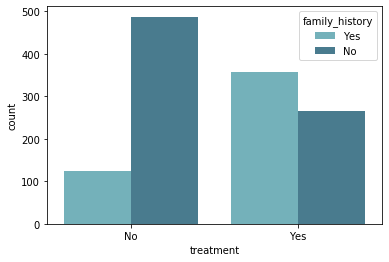

In [164]:
# Going into this dataset, We were curious as to whether or not family history affected how the participant 
# handled their mental health.

# It seems that people with family history of mental health are a lot more likely to seek out 
# treatment compared to those who have never had a family history.

sns.countplot(data=df,x='treatment', hue='family_history',palette='GnBu_d')

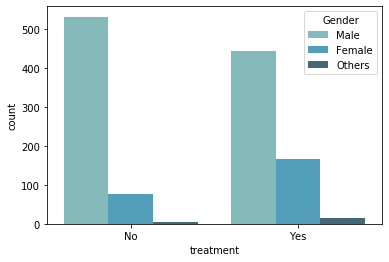

In [165]:
# Going into this dataset, We were curious as to whether or not gender is an important factor.

# It seems that men are a lot more likely to seek out treatment compared to other genders, surprisingly Others as well.

sns.countplot(data=df,x='treatment', hue='Gender',palette='GnBu_d')

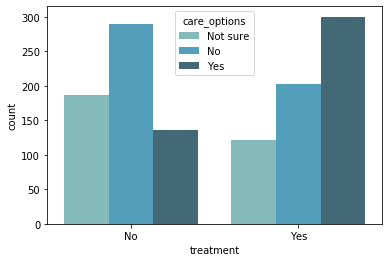

In [166]:
# Going into this dataset, We were curious as to whether or not lack of mental health resources is 
# an important factor.

# Again, surprisingly the availability of such resources in work setting encouraged them to seek out treatments
# instead for them to reach outside.

sns.countplot(data=df,x='treatment', hue='care_options',palette='GnBu_d')

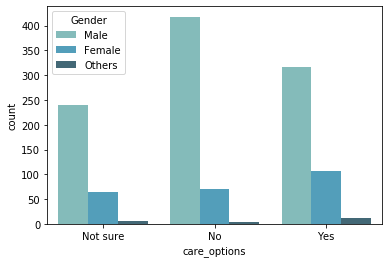

In [167]:
# Going into this dataset, it seems that fewer male but more female work in company with care option provided.

# Apparently not too much insight from here.

sns.countplot(data=df,x='care_options', hue='Gender',palette='GnBu_d')

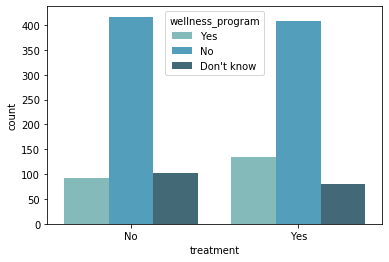

In [168]:
# Going into this dataset, it seems that wellness programme might be an important factor contributing to
# workers seeking for mental health services outside if work pressure is not properly relieved in work setting.


sns.countplot(data=df,x='treatment', hue='wellness_program',palette='GnBu_d')

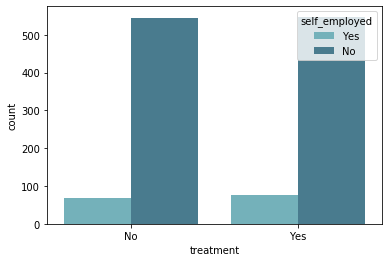

In [169]:
# Going into this dataset, self employed people might be a little bit at higher risk.


sns.countplot(data=df,x='treatment', hue='self_employed',palette='GnBu_d')

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


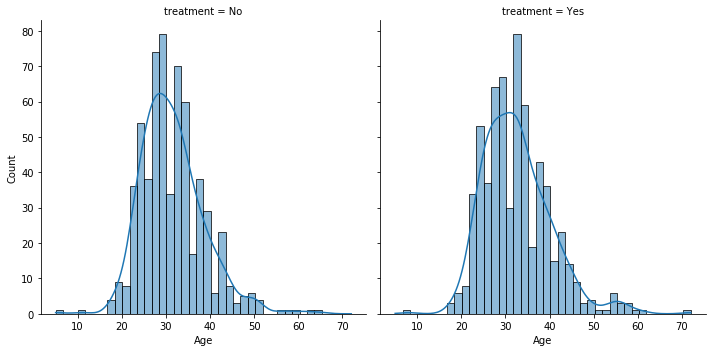

In [170]:
# Explore relationship between age and traetement status
sns.displot(data=df, x='Age',col='treatment',kde=True)

### Data Preprocessing - Encoding

In [171]:
# Encoding: One-hot encoding of all variables

dfdummiescol = df[['Gender', 'self_employed', 'family_history','remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'US_or_not',]]
dfonehotdummy = pd.get_dummies(dfdummiescol, drop_first=True)

In [172]:
# Setting X_prep, y_prep set

X_prep = pd.concat([dfonehotdummy,df[['no_employees','leave','Age']]],axis=1)
y_prep = df['treatment']

In [173]:
# Encoding: Ordinal encoding of all variables

from sklearn.preprocessing import OrdinalEncoder

no_employees = ['1-5','6-25','26-100','100-500','500-1000','More than 1000']
leave = ["Don't know",'Very easy','Somewhat easy','Somewhat difficult','Very difficult']

ordi = OrdinalEncoder(categories=[no_employees,leave])
X_prep[['no_employees','leave']] = ordi.fit_transform(X_prep[['no_employees','leave']])
X_prep[['no_employees','leave']]

,no_employees,leave
18,0.0,1.0
19,1.0,2.0
20,3.0,3.0
21,0.0,3.0
22,2.0,0.0
...,...,...
1254,2.0,2.0
1255,2.0,3.0
1256,5.0,3.0
1257,3.0,0.0


In [174]:
# Setting X, y train & test set
X = X_prep
y = y_prep

In [175]:
# Encoding: Label encoding of y
# For all scenarios which require y label encoding, including XGBoost.


from sklearn.preprocessing import LabelEncoder

labelenc = LabelEncoder()
labelencoded_y = labelenc.fit_transform(y)

## Prepping for model building
Using four model classifiers, we wanted to first, see if we can create a model that accurately predicts whether or not a participant will seek out treatment. After that, we wanted to see the most important features (variables) in determinating this factor.


## Splitting training and test set, Model-building

In [176]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,labelencoded_y,test_size=0.2,random_state=42)

In [177]:
# MinMaxScaling of Age only
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train[['Age']] = scaler.fit_transform(X_train[['Age']])
X_test[['Age']] = scaler.transform(X_test[['Age']])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

### Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(random_state=42)

logmodel.fit(X_train, y_train)
print(logmodel.coef_)
print(logmodel.intercept_)

[[-0.58462228  0.80400031 -0.17268748  1.43017367  0.03639194  0.15308107
  -0.02351241  0.56675437 -0.15203938  0.84007408  0.14636413 -0.01155551
  -0.22003865 -0.38179164 -0.25842537  0.2085642  -0.45755268  0.16744635
   0.10055617 -0.23517145  0.54108041  1.3513919  -0.25367414 -0.6342683
   0.51808811  0.32711799 -0.19909719  0.37977123  0.0055815   0.09264831
   0.3002514   0.08599795 -0.09120902  0.18888147  0.66660177]]
[-1.56467493]


In [179]:
predictions = logmodel.predict(X_test)

##### Classification Report

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       117
           1       0.75      0.69      0.72       131

    accuracy                           0.71       248
   macro avg       0.71      0.72      0.71       248
weighted avg       0.72      0.71      0.71       248



##### Confusion Matrix

In [181]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tn, fp, fn, tp)
print([tp,fp])
print([fn,tn])

87 30 41 90
[90, 30]
[41, 87]


##### Hyperparameter Tuning - GridSearchCV

In [219]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,5), "penalty":["l1","l2"]}
logreg_cv=GridSearchCV(logmodel,grid,cv=10,scoring='f1',n_jobs=-1,verbose=2)
logreg_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=2)

In [220]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.6850457143259165


In [221]:
# Applying back best params to the model

logmodel_tuned = LogisticRegression(random_state=42,C=1.0,penalty='l2')
logmodel_tuned.fit(X_train,y_train)
predictions_tuned = logmodel_tuned.predict(X_test)
print(classification_report(y_test,predictions_tuned))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       117
           1       0.75      0.69      0.72       131

    accuracy                           0.71       248
   macro avg       0.71      0.72      0.71       248
weighted avg       0.72      0.71      0.71       248



### kNN

In [232]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

#Try running from k=1 through 20 and record f1 score
k_range = range(1,21)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.f1_score(y_test,y_pred)
        scores_list.append(metrics.f1_score(y_test,y_pred))
scores

{1: 0.6166666666666667,
 2: 0.4198895027624309,
 3: 0.5676855895196506,
 4: 0.489795918367347,
 5: 0.5676855895196506,
 6: 0.504950495049505,
 7: 0.5964912280701754,
 8: 0.5428571428571428,
 9: 0.5764192139737991,
 10: 0.516431924882629,
 11: 0.5652173913043478,
 12: 0.5238095238095237,
 13: 0.5625000000000001,
 14: 0.5142857142857142,
 15: 0.5233644859813084,
 16: 0.5047619047619047,
 17: 0.5650224215246636,
 18: 0.5238095238095237,
 19: 0.5520361990950227,
 20: 0.5258215962441315}

##### Classification Report


In [233]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.78      0.64       117
           1       0.68      0.43      0.53       131

    accuracy                           0.59       248
   macro avg       0.62      0.60      0.58       248
weighted avg       0.62      0.59      0.58       248



##### Confusion matrix

In [234]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print([tp,fp])
print([fn,tn])

91 26 75 56
[56, 26]
[75, 91]


##### Hyperparameter Tuning - GridSearchCV

In [235]:
# GridSearchCV
knn = KNeighborsClassifier()
params = {'n_neighbors':range(1, 21)}
grid = GridSearchCV(knn, param_grid=params, cv=10,n_jobs=-1,verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test,y_test))


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s


{'n_neighbors': 19}
0.6008064516129032


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


In [239]:
# Applying back best params to the model

knn_tuned = KNeighborsClassifier(n_neighbors=19)
knn_tuned.fit(X_train,y_train)
y_pred_tuned = knn_tuned.predict(X_test)
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.56      0.75      0.64       117
           1       0.68      0.47      0.55       131

    accuracy                           0.60       248
   macro avg       0.62      0.61      0.60       248
weighted avg       0.62      0.60      0.59       248



### Random Forest Classifier

In [77]:
# Building the decision tree model: Before hypertuning

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [78]:
# Quick test with the model using classification report

from sklearn.metrics import classification_report
y_train_pred = forest.predict(X_train)
print(f'Training Report: {classification_report(y_train,y_train_pred)}')

y_test_pred = forest.predict(X_test)
print(f'Test Report: {classification_report(y_test,y_test_pred)}')

Training Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       495
           1       1.00      1.00      1.00       493

    accuracy                           1.00       988
   macro avg       1.00      1.00      1.00       988
weighted avg       1.00      1.00      1.00       988

Test Report:               precision    recall  f1-score   support

           0       0.69      0.74      0.72       117
           1       0.75      0.70      0.73       131

    accuracy                           0.72       248
   macro avg       0.72      0.72      0.72       248
weighted avg       0.72      0.72      0.72       248



In [79]:
# Print confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
print(confusion_matrix(y_test,y_test_pred))

[[87 30]
 [39 92]]


In [128]:
# Hypertuning: Tune the hotel - Using RamdomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestClassifier(random_state=42,criterion='entropy',bootstrap=True,max_depth=3)
params = {'criterion':['gini','entropy'],
          'n_estimators':[200,210,220,230,240,250,260,270,280,290,300,310,320,330],
         'min_samples_leaf':[4,5,6,7,8],
         'min_samples_split':[10,11,12,13,14,15]}
random = RandomizedSearchCV(model,param_distributions=params,n_jobs=-1,cv=20,random_state=42,verbose=2,n_iter=300,scoring='f1')
random.fit(X_train,y_train)
print(random.best_score_)
print(random.best_params_)

Fitting 20 folds for each of 300 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 14.0min finished


0.9391666666666667
{'n_estimators': 320, 'min_samples_split': 13, 'min_samples_leaf': 5, 'criterion': 'entropy'}


In [145]:
# Hypertuning: Tune the hotel - Using GridSearchCV
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(random_state=42)
params = {'criterion':['gini','entropy'],
          'max_depth':range(1,21),
          'bootstrap':[True,False],
          'n_estimators':range(40,400,40),
         'min_samples_leaf':[4,5,6,7,8],
         'min_samples_split':[10,11,12,13,14,15]}
grid = GridSearchCV(model,param_grid=params,n_jobs=-1,cv=5,verbose=2,scoring='f1')
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

Fitting 5 folds for each of 21600 candidates, totalling 108000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 1021 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1466 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1993 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2600 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3289 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4058 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4909 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5840 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 6853 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 7946 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 9121 tasks      | 

0.9392084106369822
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 280}


In [80]:
# Apply the best params back to the model
forest2 = RandomForestClassifier(random_state=42,
                               n_estimators=280,
                               min_samples_split=10,
                               min_samples_leaf=4,
                               max_depth=3,
                               criterion='entropy',
                              bootstrap=True,
                                max_features=13)
forest2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=13,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=280, random_state=42)

In [777]:
# Using cross_val_score to check again the recall score matching with GSCV
from sklearn.model_selection import cross_val_score
cross_val_score(forest2,X_train,y_train,scoring='recall',cv=5)

array([0.96969697, 0.94949495, 0.92929293, 0.96938776, 0.94897959])

In [81]:
# Test the results using improved model settings
y_test_tuned_pred = forest2.predict(X_test) 
print(f'Tuned Report: {classification_report(y_test,y_test_tuned_pred)}')


## Improvement of recall score after hyperparameter tuning

Tuned Report:               precision    recall  f1-score   support

           0       0.72      0.74      0.73       117
           1       0.76      0.75      0.75       131

    accuracy                           0.74       248
   macro avg       0.74      0.74      0.74       248
weighted avg       0.74      0.74      0.74       248



In [82]:
# Print confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_test_tuned_pred).ravel()
print(confusion_matrix(y_test,y_test_tuned_pred))

[[86 31]
 [33 98]]


In [83]:
# Comparison between base model vs. tuned model (Recall)
def evaluate(model, test_features, test_label):
    predictions = model.predict(test_features)
    tn,fp,fn,tp = confusion_matrix(test_label,predictions).ravel()
    errors = fn
    recall_score = 100*(tp/(tp+fn))
    print("Model performance")
    print("Recall Score: {:0.2f}%.".format(recall_score))
    return recall_score

In [84]:
base_model = RandomForestClassifier(random_state = 42)
base_model.fit(X_train, y_train)
base_recall = evaluate(base_model, X_test, y_test)

Model performance
Recall Score: 70.23%.


In [85]:
tuned_model = RandomForestClassifier(random_state=42,
                               n_estimators=280,
                               min_samples_split=10,
                               min_samples_leaf=4,
                               max_depth=3,
                               criterion='entropy',
                              bootstrap=True,
                                max_features=13)
tuned_model.fit(X_train, y_train)
tuned_recall = evaluate(tuned_model, X_test, y_test)

Model performance
Recall Score: 74.81%.


In [700]:
########## Graph Plotting about Training Visualizations ############



In [778]:
##### Number of trees training curve
# Grid with only the number of trees changed
from sklearn.model_selection import GridSearchCV
tree_grid = {'n_estimators': [int(x) for x in np.linspace(40, 400, 40)]}
final_model = RandomForestClassifier(random_state=42,
                                     min_samples_split=10,
                                     min_samples_leaf=4,
                                     n_estimators=280,
                                     max_depth=3,
                                     criterion='entropy',
                                     bootstrap=True)

# Create the grid search model and fit to the trainaing data
tree_grid_search = GridSearchCV(final_model, param_grid=tree_grid, verbose = 2, n_jobs=-1, cv = 5,
                                scoring = 'f1',return_train_score=True)
tree_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   27.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=4,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=280, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [786]:
tree_grid_search.cv_results_

{'mean_fit_time': array([0.15251594, 0.14848051, 0.19141421, 0.22088156, 0.2784935 ,
        0.30115681, 0.32511468, 0.35879216, 0.39466515, 0.4146493 ,
        0.4407537 , 0.49410195, 0.55252519, 0.55765686, 0.60919352,
        0.71414309, 0.74077559, 0.75731444, 0.75451989, 0.82011495,
        0.95127044, 0.99116879, 0.90339508, 1.00309415, 1.07660484,
        1.08239117, 1.12211814, 1.10714293, 1.24078145, 1.26978254,
        1.25379548, 1.33161197, 1.30642762, 1.32652164, 1.40197453,
        1.49155116, 1.46114454, 1.55707626, 1.58904777, 1.28130226]),
 'std_fit_time': array([0.03848794, 0.02703229, 0.0079201 , 0.00722663, 0.03464479,
        0.01456726, 0.02576514, 0.01186296, 0.0221552 , 0.03657098,
        0.03069321, 0.00809882, 0.00655764, 0.03330395, 0.02843599,
        0.03004464, 0.04799193, 0.03899335, 0.04643606, 0.04613831,
        0.04786675, 0.03099832, 0.0214571 , 0.01595462, 0.02463202,
        0.04906781, 0.02048606, 0.02753769, 0.04421577, 0.02705105,
        0.058

In [797]:
# Plotting the results w.r.t. different param setttings - Number of trees
def plot_results(model,param='n_estimators',name='Num of Trees'):
    param_name = 'param_%s' % param
    
    # Extract the information from the cross validation model
    train_scores = model.cv_results_['mean_train_score']
    test_scores = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])
    
    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(10, 6))
    plt.subplot(121)
    plt.plot(param_values, train_scores, 'bo-', label = 'train')
    plt.plot(param_values, test_scores, 'go-', label = 'test')
    plt.ylim(ymin =0.7, ymax = 1)
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.ylim(ymin = 0.0, ymax = 2.0)
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)
    
    
    plt.tight_layout(pad = 4)

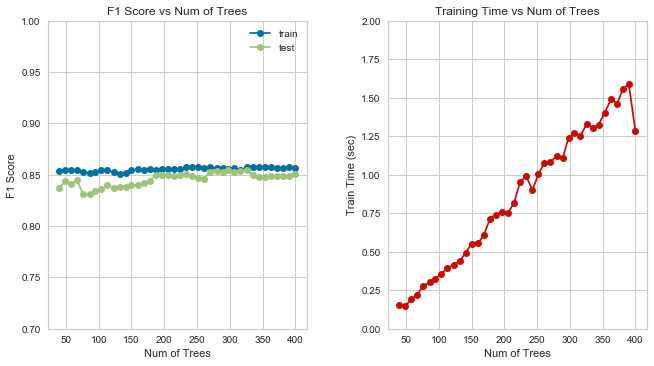

In [798]:
# Plotting: Number of Trees vs Recall Score
plot_results(tree_grid_search)

In [789]:
##### Max Depth training curve
# Grid with only max depth changed
depth_grid = {'max_depth': list(range(1,21))}

In [790]:
# Create the grid search and fit on the training data
depth_grid_search = GridSearchCV(final_model, param_grid=depth_grid, cv = 3, n_jobs=-1, verbose= 2,
                                  scoring = 'f1',return_train_score=True)
depth_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=4,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=280, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

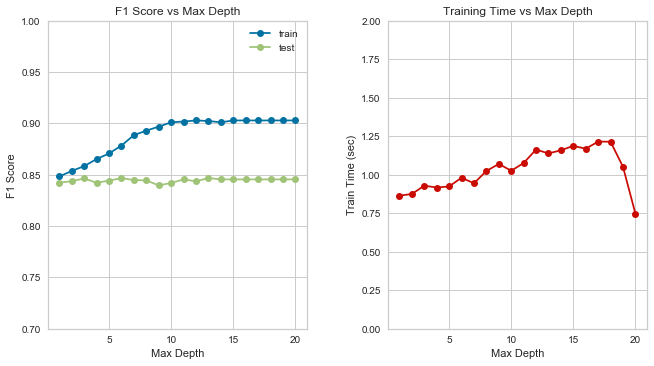

In [799]:
plot_results(depth_grid_search,param='max_depth',name='Max Depth')

In [792]:
##### Number of Features training curve
# Grid with only the number of features changed
featurenum_grid = {'max_features': list(range(1,37))}

In [793]:
# Create the grid search and fit on the training data
featurenum_grid_search = GridSearchCV(final_model, param_grid=featurenum_grid, cv = 3, n_jobs=-1, verbose= 2,
                                  scoring = 'f1',return_train_score=True)
featurenum_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   16.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=4,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=280, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

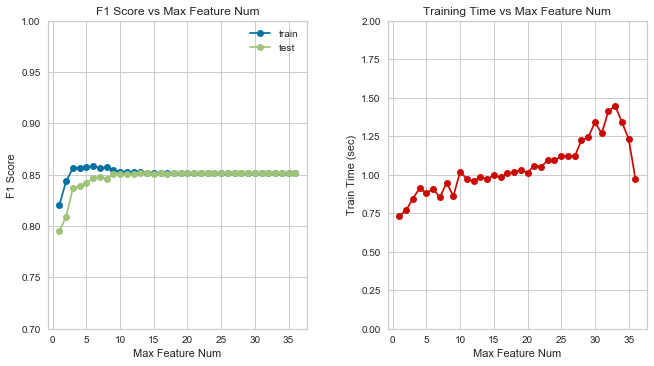

In [800]:
plot_results(featurenum_grid_search,param='max_features',name='Max Feature Num')

In [711]:
# Updating the final model
final_rfm = RandomForestClassifier(random_state=42,
                                     min_samples_split=10,
                                     min_samples_leaf=4,
                                     n_estimators=280,
                                     max_depth=3,
                                     criterion='entropy',
                                     bootstrap=True,
                                  max_features=13)


In [531]:
###############################
#### Visualizing one decision tree 



In [806]:
# Feature importance
importance_value = final_rfm.fit(X_train,y_train).feature_importances_
col = X_train.columns
feature_dict = dict(zip(col, importance_value))
feature_df = pd.DataFrame(data=feature_dict,index=[1,2]).T
feature_df = feature_df.drop([2],axis=1)
feature_df = feature_df.rename(columns={1:'Importance'})
feature_df.index = feature_df.index.rename('Feature')
feature_df.sort_values(by='Importance',ascending=False)

,Importance
Feature,
work_interfere,0.692458
family_history_Yes,0.127521
care_options_Yes,0.061576
benefits_Yes,0.026883
Gender_Male,0.012031
leave,0.009923
anonymity_Yes,0.009034
Age,0.008938
care_options_Not sure,0.007226


In [713]:
# Use sklearn to export the tree 
from sklearn.tree import export_graphviz

# Write the decision tree as a dot file
visual_tree = final_rfm.fit(X_train,y_train).estimators_[12]
export_graphviz(visual_tree, out_file = 'best_tree.dot', feature_names = X_train.columns, 
                precision = 2, filled = True, rounded = True, max_depth = None)

[Text(558.0, 665.91, 'work_interfere <= 1.5\nentropy = 1.0\nsamples = 632\nvalue = [501, 487]\nclass = No'),
 Text(279.0, 475.65, 'work_interfere <= 0.5\nentropy = 0.36\nsamples = 245\nvalue = [358, 26]\nclass = No'),
 Text(139.5, 285.39, 'coworkers_Yes <= 0.5\nentropy = 0.1\nsamples = 145\nvalue = [225, 3]\nclass = No'),
 Text(69.75, 95.13, 'entropy = 0.0\nsamples = 117\nvalue = [184, 0]\nclass = No'),
 Text(209.25, 95.13, 'entropy = 0.36\nsamples = 28\nvalue = [41, 3]\nclass = No'),
 Text(418.5, 285.39, 'benefits_Yes <= 0.5\nentropy = 0.6\nsamples = 100\nvalue = [133, 23]\nclass = No'),
 Text(348.75, 95.13, 'entropy = 0.46\nsamples = 73\nvalue = [102, 11]\nclass = No'),
 Text(488.25, 95.13, 'entropy = 0.85\nsamples = 27\nvalue = [31, 12]\nclass = No'),
 Text(837.0, 475.65, 'benefits_Yes <= 0.5\nentropy = 0.79\nsamples = 387\nvalue = [143, 461]\nclass = Yes'),
 Text(697.5, 285.39, 'anonymity_Yes <= 0.5\nentropy = 0.9\nsamples = 239\nvalue = [115, 254]\nclass = Yes'),
 Text(627.75, 95.

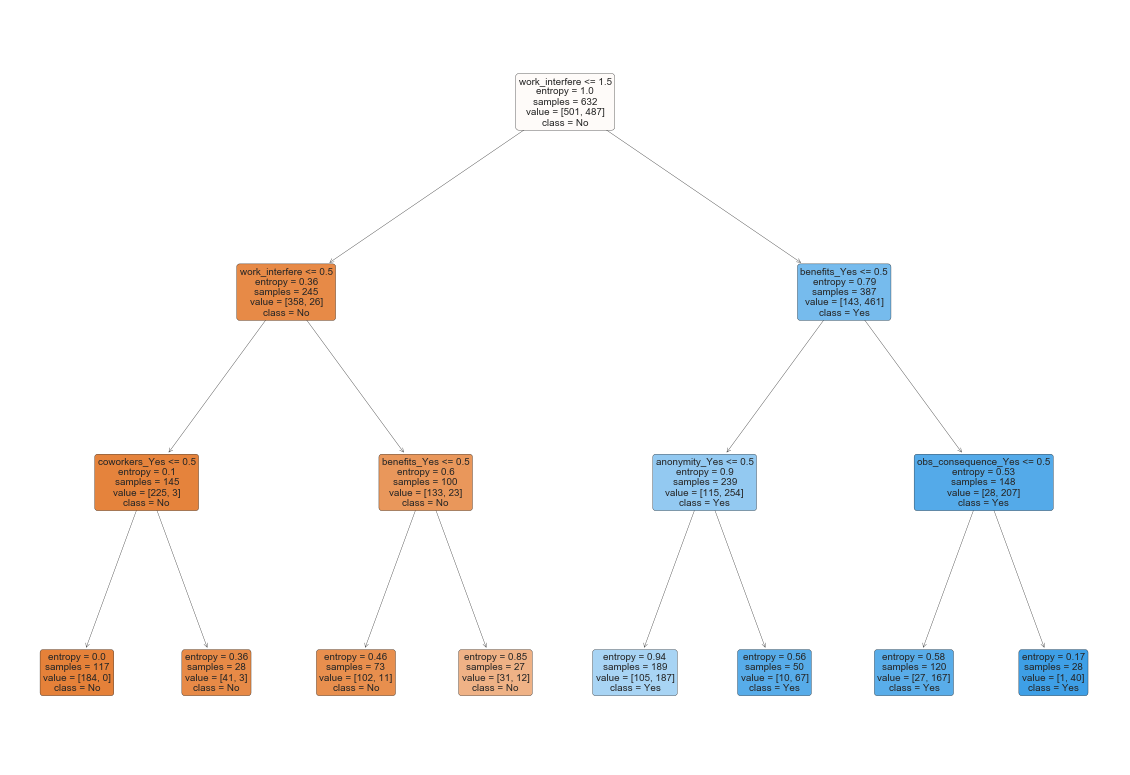

In [721]:
from sklearn import tree
plt.figure(figsize=(20,14))
tree.plot_tree(visual_tree,feature_names=X_train.columns,rounded=True,filled=True,
               max_depth=None,class_names=["No","Yes"],precision=2,impurity=True)

In [714]:
# Use pydot for converting to an image file
import pydot

# Import the dot file to a graph and then convert to a png
(graph, ) = pydot.graph_from_dot_file('best_tree.dot')
graph.write_png('best_tree.png')



In [737]:
# Import dalex library to present feature importance bar chart

import dalex as dx
mh = dx.Explainer(final_rfm, X_train, y_train, 
                  label = "History of Receiving Mental Health Treatment Determinants")

Preparation of a new explainer is initiated

  -> data              : 988 rows 36 cols
  -> target variable   : 988 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : History of Receiving Mental Health Treatment Determinants
  -> predict function  : <function yhat_proba_default at 0x148d309e0> will be used (default)
  -> predicted values  : min = 0.0787, mean = 0.499, max = 0.892
  -> predict function  : accepts pandas.DataFrame and numpy.ndarray
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.863, mean = -9.98e-05, max = 0.908
  -> model_info        : package sklearn

A new explainer has been created!


In [738]:
mp_rf = mh.model_parts()
mp_rf.result

,variable,dropout_loss,label
0,mental_vs_physical_Yes,0.085213,History of Receiving Mental Health Treatment D...
1,seek_help_Yes,0.085215,History of Receiving Mental Health Treatment D...
2,phys_health_consequence_No,0.085216,History of Receiving Mental Health Treatment D...
3,tech_company_Yes,0.085234,History of Receiving Mental Health Treatment D...
4,_full_model_,0.085242,History of Receiving Mental Health Treatment D...
5,phys_health_consequence_Yes,0.085247,History of Receiving Mental Health Treatment D...
6,mental_vs_physical_No,0.085256,History of Receiving Mental Health Treatment D...
7,remote_work_Yes,0.085267,History of Receiving Mental Health Treatment D...
8,Gender_Others,0.085271,History of Receiving Mental Health Treatment D...
9,phys_health_interview_No,0.085287,History of Receiving Mental Health Treatment D...


In [740]:
# Feature Importance
# Figure 16.6: Mean variable-importance calculated by using 10 permutations and the root-mean- 
# squared-error loss-function for the random forest model for the data using 1-AUC as the loss function.

# https://pbiecek.github.io/ema/featureImportance.html#featureImportancePython

mp_rf.plot()

### XGBoost

In [242]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [263]:
#XGBoost(Tuned)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgbmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=np.nan, monotone_constraints='()',
              n_estimators=800, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=2724, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=0)
xgbmodel.fit(X_train, y_train)
y_pred_xgb = xgbmodel.predict(X_test)
print(y_pred_xgb)
predictions = [round(value) for value in y_pred_xgb]
accuracy = f1_score(y_test, predictions)
print('F1:%.2f%%' % (accuracy * 100.0))
print(classification_report(y_test,predictions))
y_pred_prob_xgb = xgbmodel.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
precision_xgb, recall_xgb, th_xgb = precision_recall_curve(y_test, y_pred_prob_xgb)

[0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1
 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0
 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0
 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1
 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1]
F1:73.64%
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       117
           1       0.75      0.73      0.74       131

    accuracy                           0.73       248
   macro avg       0.73      0.73      0.73       248
weighted avg       0.73      0.73      0.73       248



### Model Comparison

In [252]:
#Logistic Regression(Tuned)
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(C=1.0, penalty = 'l2')

logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(logmodel.coef_)
print(logmodel.intercept_)
print(classification_report(y_test,predictions))
y_pred_prob_lr = logmodel.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

[[-0.58462228  0.80400031 -0.17268748  1.43017367  0.03639194  0.15308107
  -0.02351241  0.56675437 -0.15203938  0.84007408  0.14636413 -0.01155551
  -0.22003865 -0.38179164 -0.25842537  0.2085642  -0.45755268  0.16744635
   0.10055617 -0.23517145  0.54108041  1.3513919  -0.25367414 -0.6342683
   0.51808811  0.32711799 -0.19909719  0.37977123  0.0055815   0.09264831
   0.3002514   0.08599795 -0.09120902  0.18888147  0.66660177]]
[-1.56467493]
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       117
           1       0.75      0.69      0.72       131

    accuracy                           0.71       248
   macro avg       0.71      0.72      0.71       248
weighted avg       0.72      0.71      0.71       248



In [253]:
#kNN(Tuned)
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))
y_pred_prob_KNN = knn.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)
        

              precision    recall  f1-score   support

           0       0.56      0.75      0.64       117
           1       0.68      0.47      0.55       131

    accuracy                           0.60       248
   macro avg       0.62      0.61      0.60       248
weighted avg       0.62      0.60      0.59       248



In [254]:
#Random Forest(Tuned)
forest2 = RandomForestClassifier(random_state=42,
                               n_estimators=280,
                               min_samples_split=10,
                               min_samples_leaf=4,
                               max_depth=3,
                               criterion='entropy',
                              bootstrap=True,
                                max_features=13)
forest2.fit(X_train,y_train)
y_test_tuned_pred = forest2.predict(X_test) 
print(f'Tuned Report: {classification_report(y_test,y_test_tuned_pred)}')
y_pred_prob_rf = forest2.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)

Tuned Report:               precision    recall  f1-score   support

           0       0.72      0.74      0.73       117
           1       0.76      0.75      0.75       131

    accuracy                           0.74       248
   macro avg       0.74      0.74      0.74       248
weighted avg       0.74      0.74      0.74       248



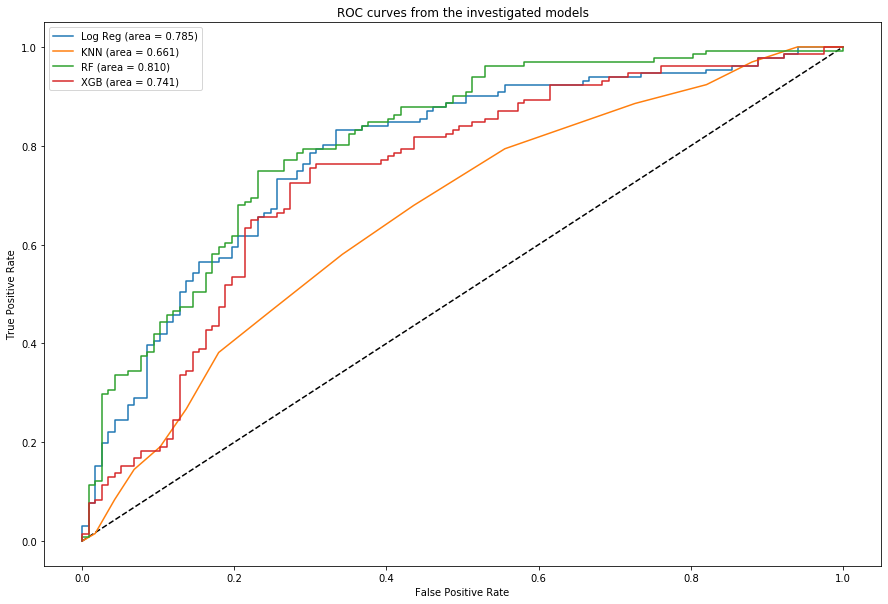

In [264]:
#plot ROC curve
plt.figure(figsize=(15,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, label='XGB (area = %0.3f)' % roc_auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

In [758]:
########################
##### ROC Curve and AUC Curve 


In [760]:
import plotly.express as px
from sklearn.metrics import roc_curve, auc

final_rfm.fit(X_train, y_train)
y_score = final_rfm.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
    
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [761]:
from sklearn.metrics import precision_recall_curve, auc

final_rfm.fit(X_train, y_train)
y_score = final_rfm.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

### Using new library PyCaret 2.0 for model building (Implementation)

In [248]:
dfforpy = df.drop(['Country'],axis=1)

In [249]:
from pycaret.classification import *
clf1 = setup(dfforpy, target = 'treatment')

Setup Succesfully Completed!


,Description,Value
0,session_id,2724
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(1236, 23)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,21
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [250]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.7329,0.7909,0.7345,0.7387,0.7351,0.4656,0.4674,1.9803
1,Extra Trees Classifier,0.7282,0.7785,0.7389,0.7295,0.7329,0.4560,0.4579,0.2483
2,Logistic Regression,0.7214,0.7791,0.7093,0.7326,0.7190,0.4428,0.4450,0.0354
3,Gradient Boosting Classifier,0.7180,0.7688,0.7232,0.7210,0.7209,0.4358,0.4372,0.1613
4,Linear Discriminant Analysis,0.7168,0.7794,0.6933,0.7329,0.7109,0.4337,0.4362,0.0138
5,Ridge Classifier,0.7156,0.0000,0.6933,0.7313,0.7101,0.4314,0.4338,0.0065
6,Ada Boost Classifier,0.7109,0.7653,0.6842,0.7296,0.7044,0.4221,0.4247,0.1007
7,Light Gradient Boosting Machine,0.7109,0.7672,0.7114,0.7149,0.7128,0.4218,0.4221,0.0541
8,Extreme Gradient Boosting,0.7028,0.7587,0.7025,0.7094,0.7050,0.4057,0.4068,0.2574
9,Random Forest Classifier,0.6924,0.7517,0.6265,0.7290,0.6723,0.3853,0.3906,0.1124


In [86]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [259]:
xg = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6897,0.7267,0.6591,0.7073,0.6824,0.3797,0.3806
1,0.7241,0.7553,0.6591,0.7632,0.7073,0.4491,0.4534
2,0.6667,0.7590,0.6818,0.6667,0.6742,0.3331,0.3332
3,0.6897,0.7563,0.7045,0.6889,0.6966,0.3791,0.3792
4,0.7931,0.8816,0.7500,0.8250,0.7857,0.5866,0.5891
5,0.6860,0.7570,0.6818,0.6977,0.6897,0.3721,0.3722
6,0.7558,0.7716,0.7955,0.7447,0.7692,0.5106,0.5118
7,0.6628,0.7101,0.6744,0.6591,0.6667,0.3256,0.3257
8,0.6860,0.7588,0.6977,0.6818,0.6897,0.3721,0.3722
9,0.6744,0.7107,0.7209,0.6596,0.6889,0.3488,0.3504


In [260]:
tuned_xg = tune_model(xg, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6897,0.7225,0.6591,0.7073,0.6824,0.3797,0.3806
1,0.7126,0.7664,0.5909,0.7879,0.6753,0.4269,0.4411
2,0.6782,0.7489,0.7045,0.6739,0.6889,0.3559,0.3563
3,0.6552,0.7500,0.7045,0.6458,0.6739,0.3095,0.3108
4,0.7931,0.8647,0.7273,0.8421,0.7805,0.5868,0.5925
5,0.7093,0.7944,0.7045,0.7209,0.7126,0.4186,0.4187
6,0.7442,0.8214,0.8182,0.7200,0.7660,0.4864,0.4913
7,0.6395,0.6874,0.6512,0.6364,0.6437,0.2791,0.2791
8,0.7209,0.7831,0.7209,0.7209,0.7209,0.4419,0.4419
9,0.7093,0.7885,0.8140,0.6731,0.7368,0.4186,0.4281


In [261]:
tuned_xg

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=800, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=2724, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [762]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…